In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
date = datetime.datetime.now()

def transfer_date(datestr):
    datestr = str(datestr).split(' ')[0].replace('-','')
    return datestr
def crawler(datestr):
    r = requests.post('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date='+datestr+'&type=ALLBUT0999')
    df = pd.read_csv(StringIO(r.text.replace('=','')), 
            header=["證券代號" in l for l in r.text.split("\n")].index(True)-1)
    df = df.set_index('證券代號')
    return(df)

dict_stock = {}
datespan = 100
date_index = 0
# print(transfer_date(date-datetime.timedelta(days=date_index)))
while len(dict_stock) < datespan:
    time.sleep(5)
    now_date = transfer_date(date-datetime.timedelta(days=date_index))
    try:
        dict_stock.update({now_date
            :crawler(now_date)})
        # date_index+=1
        # print('sucessfull at'+' '+str(transfer_date(now_date)))
    except:
        print('Fails at'+' '+str(transfer_date(now_date)))
    date_index+=1

close = pd.DataFrame({k:d['收盤價'].apply(pd.to_numeric,errors='coerce') for k,d in dict_stock.items()}).transpose()
close.index = pd.to_datetime(close.index)
close = close.sort_index()

Fails at 20191124
Fails at 20191123
Fails at 20191117
Fails at 20191116
Fails at 20191110
Fails at 20191109
Fails at 20191103
Fails at 20191102
Fails at 20191027
Fails at 20191026
Fails at 20191020
Fails at 20191019
Fails at 20191013
Fails at 20191012
Fails at 20191011
Fails at 20191010
Fails at 20191006
Fails at 20191005
Fails at 20190930
Fails at 20190929
Fails at 20190928
Fails at 20190922
Fails at 20190921
Fails at 20190915
Fails at 20190914
Fails at 20190913
Fails at 20190908
Fails at 20190907
Fails at 20190901
Fails at 20190831
Fails at 20190825
Fails at 20190824
Fails at 20190818
Fails at 20190817
Fails at 20190811
Fails at 20190810
Fails at 20190809
Fails at 20190804
Fails at 20190803
Fails at 20190728
Fails at 20190727
Fails at 20190721
Fails at 20190720
Fails at 20190714
Fails at 20190713
Fails at 20190707
Fails at 20190706


In [41]:
def Monte_Method(stock):
    close_log_return = np.log(close[stock]/close[stock].shift())
#     mu = (close[stock].iloc[-1]-close[stock].iloc[0])/close[stock].iloc[0]
#     Std = close[stock].std()
    mu = close_log_return.mean()
    Std = close_log_return.std()*np.sqrt(100)
    dt = 1/100
    stock_copy = close[stock].copy()
    for i in range(len(close[stock])):
        if i==0:
            pass
        else:
            S0 = close[stock].iloc[i-1]
            stock_copy.iloc[i] = S0 * np.exp((mu - 0.5 *Std**2)*dt + Std*np.sqrt(dt)*np.random.standard_normal())
    con = pd.concat((close[stock],stock_copy),axis = 1)
    con.columns = [stock,'Monte']
    return con

In [42]:
conclusion = Monte_Method('0050')

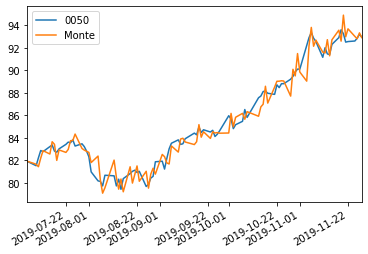

In [43]:
conclusion.plot()

In [44]:
stock = '0050'
close_log_return = np.log(close[stock]/close[stock].shift())
close_log_return

2019-07-05         NaN
2019-07-08   -0.003670
2019-07-09   -0.001226
2019-07-10    0.008552
2019-07-11    0.007876
2019-07-12   -0.001208
2019-07-15    0.005423
2019-07-16    0.001801
2019-07-17   -0.006621
2019-07-18   -0.001208
2019-07-19    0.003621
2019-07-22    0.004808
2019-07-23    0.002395
2019-07-24   -0.000598
2019-07-25    0.002988
2019-07-26   -0.006585
2019-07-29    0.002400
2019-07-30   -0.003000
2019-07-31   -0.004819
2019-08-01   -0.006057
2019-08-02   -0.016539
2019-08-05   -0.009932
2019-08-06   -0.000624
2019-08-07   -0.005006
2019-08-08    0.011849
2019-08-12   -0.000620
2019-08-13   -0.011229
2019-08-14    0.007500
2019-08-15   -0.011271
2019-08-16    0.011894
                ...   
2019-10-18   -0.002271
2019-10-21   -0.001138
2019-10-22    0.009629
2019-10-23   -0.002822
2019-10-24    0.003949
2019-10-25    0.000000
2019-10-28    0.004494
2019-10-29    0.002799
2019-10-30    0.004462
2019-10-31    0.002779
2019-11-01    0.000000
2019-11-04    0.023040
2019-11-05 

# Log return 模擬

In [26]:
stock = close.columns[:10]
close_log_return = np.log(close[stock]/close[stock].shift())

In [71]:
dict_stock_x = {}
dict_stock_y = {}
for stock_id in stock:
    L = []
    K = np.linspace(0.001,0.05,100)
    for i in range(len(K)):
        L.append(sum(close_log_return[stock_id]>K[i])/len(close_log_return[stock_id]))
    dict_stock_x.update({stock_id:K})
    dict_stock_y.update({stock_id:L})

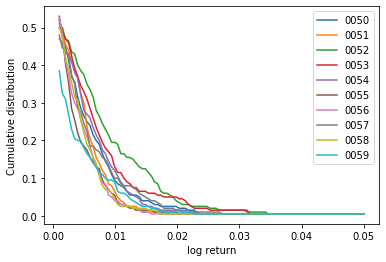

In [84]:
for i in dict_stock_x.keys():
    plt.plot(dict_stock_x[i],dict_stock_y[i],label=i)
# K = np.linspace(0.001,0.05,100)
# K_y = [x**(-3) for x in K]
# plt.plot(K,K_y,label='alpha = 3')
plt.xlabel('log return')
plt.ylabel('Cumulative distribution')
plt.legend(loc = 'best')
plt.show()